# **Neuropolis-X1**
### **Building an artificial intelligence system for human brain activity prediction (EEG, fMRI) with machine learning, deep learning, and large language models**

#### Maël Donoso, Ouroboros Neurotechnologies (https://ouroboros-neurotechnologies.com/)
*18th March 2025*

This first extension (X1) of Neuropolis includes twelve Notebooks:

*01: fMRI Preprocessing*

***02: EEG Preprocessing***

*03: Classification Models*

*04: Regression Models*

*05: Neural Networks*

*06: Convolutional Neural Networks*

*07: Recurrent Neural Networks*

*08: Transformers*

*09: Large Language Models*

*10: Large Language Model Chain-of-Thought*

*11: Large Language Model Fine-Tuning*

*12: Large Multimodal Model*

### Notebook 02

# **EEG Preprocessing**

## **1. EEG Data Extraction**

We **extract the EEG data** preprocessed by the authors of the dataset, using the neurophysiological library MNE. From each file, we extract a 2D NumPy array with dimensions (64, 80200), where the first dimension corresponds to the number of channels, and the second dimension to the number of time points. In this 2D NumPy array, each value corresponds to the voltage signal recorded at a particular electrode, and for a particular time point. We plot some data from the C1 channel, and observe some typical EEG fluctuations. 

In [1]:
import os
os.environ['OUTDATED_IGNORE'] = '1'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import mne
import yasa
import pickle

In [2]:
# Define the raw data path. 
raw_data_path = '../../Neuropolis/ds002336-download/'

# Define the preprocessed data path. 
preprocessed_data_path = '../neuropolis-x1_preprocessed_data/'

In [3]:
# Define the list of subjects. 
subjects = ['sub-xp1' + str(x).zfill(2) for x in range(1, 11)]
print(subjects)

['sub-xp101', 'sub-xp102', 'sub-xp103', 'sub-xp104', 'sub-xp105', 'sub-xp106', 'sub-xp107', 'sub-xp108', 'sub-xp109', 'sub-xp110']


In [4]:
# Define an example subject. 
subject = subjects[0]
subject

'sub-xp101'

In [5]:
# Define the path of the header file (.vhdr) for this subject, for the eegfmriNF condition. 
vhdr_path = raw_data_path + 'derivatives/' + subject + '/eeg_pp/' + subject + '_task-eegfmriNF_eeg_pp.vhdr'

# Load the EEG data using the MNE library, keeping error messages but suppressing warnings. 
channels_data = mne.io.read_raw_brainvision(vhdr_path, misc = ['ECG'], preload = True, verbose = 'ERROR')

In [6]:
# Display the number of channels. 
len(channels_data.ch_names)

64

In [7]:
# Display the channel names. 
print(channels_data.ch_names)

['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'POz', 'ECG', 'F1', 'F2', 'C1', 'C2', 'P1', 'P2', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'AF7', 'AF8', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'FT9', 'FT10', 'Fpz', 'CPz']


In [8]:
# Identify the C1 channel index. 
c1_channel_index = channels_data.ch_names.index('C1')
c1_channel_index

34

In [9]:
# Display information about the EEG data. 
channels_data.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 63 EEG, 1 misc
 custom_ref_applied: False
 dig: 66 items (3 Cardinal, 63 EEG)
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: 2015-08-14 15:34:52 UTC
 nchan: 64
 projs: []
 sfreq: 200.0 Hz
>

In [10]:
# Retrieve the sampling frequency. 
sampling_frequency = channels_data.info['sfreq']
sampling_frequency

200.0

In [11]:
# Display the time points. 
channels_data.times

array([0.00000e+00, 5.00000e-03, 1.00000e-02, ..., 4.00985e+02,
       4.00990e+02, 4.00995e+02])

In [12]:
# Display the number of time points. 
channels_data.times.shape[0]

80200

In [13]:
# Compute the total length in seconds. 
channels_data.times.shape[0] / sampling_frequency

401.0

In [14]:
# Check that the data is in float64 format. 
channels_data.times.dtype == np.dtype(np.float64)

True

In [15]:
# Compute the number of unique time differences between two consecutive onsets, rounding up to the 10th decimal. 
time_differences = np.unique(np.unique(channels_data.times[1:] - channels_data.times[:-1]).round(10))
time_differences

array([0.005])

In [16]:
# Extract the EEG data as a NumPy array. 
np_channels_data = channels_data.get_data()
np_channels_data

array([[-2.24100006e-04, -2.30300003e-04, -2.32900009e-04, ...,
        -7.44299988e-04, -7.41400024e-04, -7.40400024e-04],
       [-1.18000000e-04, -1.21500000e-04, -1.25300003e-04, ...,
        -5.90900024e-04, -5.84500000e-04, -5.82299988e-04],
       [-1.05300003e-04, -1.10800003e-04, -1.11200005e-04, ...,
        -1.06700005e-04, -1.05400002e-04, -1.03599998e-04],
       ...,
       [-2.31000004e-05, -2.07000008e-05, -2.35000000e-05, ...,
        -1.27900002e-04, -1.31800003e-04, -1.35500000e-04],
       [-4.67000008e-05, -4.81000023e-05, -4.92999992e-05, ...,
        -6.09000015e-05, -6.26000023e-05, -6.50999985e-05],
       [-2.46000004e-05, -2.73000011e-05, -3.03000011e-05, ...,
        -1.97000008e-05, -1.87000008e-05, -1.72000008e-05]])

In [17]:
# Check that this is indeed a NumPy array. 
type(np_channels_data)

numpy.ndarray

In [18]:
# Display the size of the array. 
np_channels_data.shape

(64, 80200)

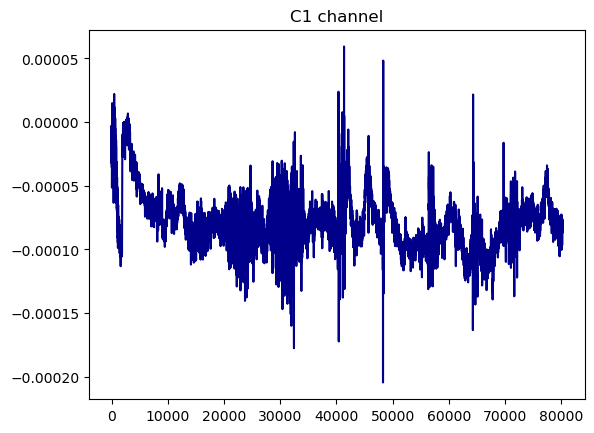

In [19]:
# Plot the data for the C1 channel. 
plt.plot(np_channels_data[c1_channel_index, :], c = 'darkblue')
plt.title('C1 channel');

In [20]:
# Define an arbitrary time interval, and compute the time points for this interval. 
time_interval = [10, 12]
starting_point, ending_point = int(sampling_frequency * time_interval[0]), int(sampling_frequency * time_interval[1])
print(str(ending_point - starting_point) + ' time points')

400 time points


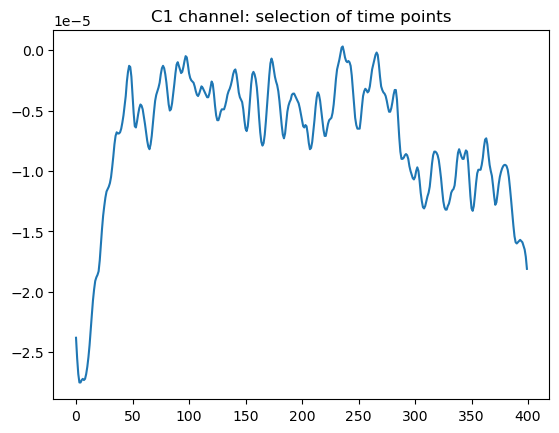

In [21]:
# Plot the data for the C1 channel, focusing on a selection of time points. 
plt.plot(np_channels_data[c1_channel_index, starting_point:ending_point])
plt.title('C1 channel: selection of time points');

## **2. Exploratory Data Analysis (EDA)**

We **explore the EEG data** by comparing the different channels. We compute the Power Spectral Density (PSD) for a selection of time points, for frequencies between 1 and 40 Hz, using both the Welch method and the multitaper method, before computing the bandpowers for a series of frequency bands of interest: delta (1-4 Hz), theta (4-8 Hz), alpha (8-12 Hz), sigma (12-16 Hz), beta (16-30 Hz), gamma (30-40 Hz). The EEG data shows some spikes that may need outlier removal. 

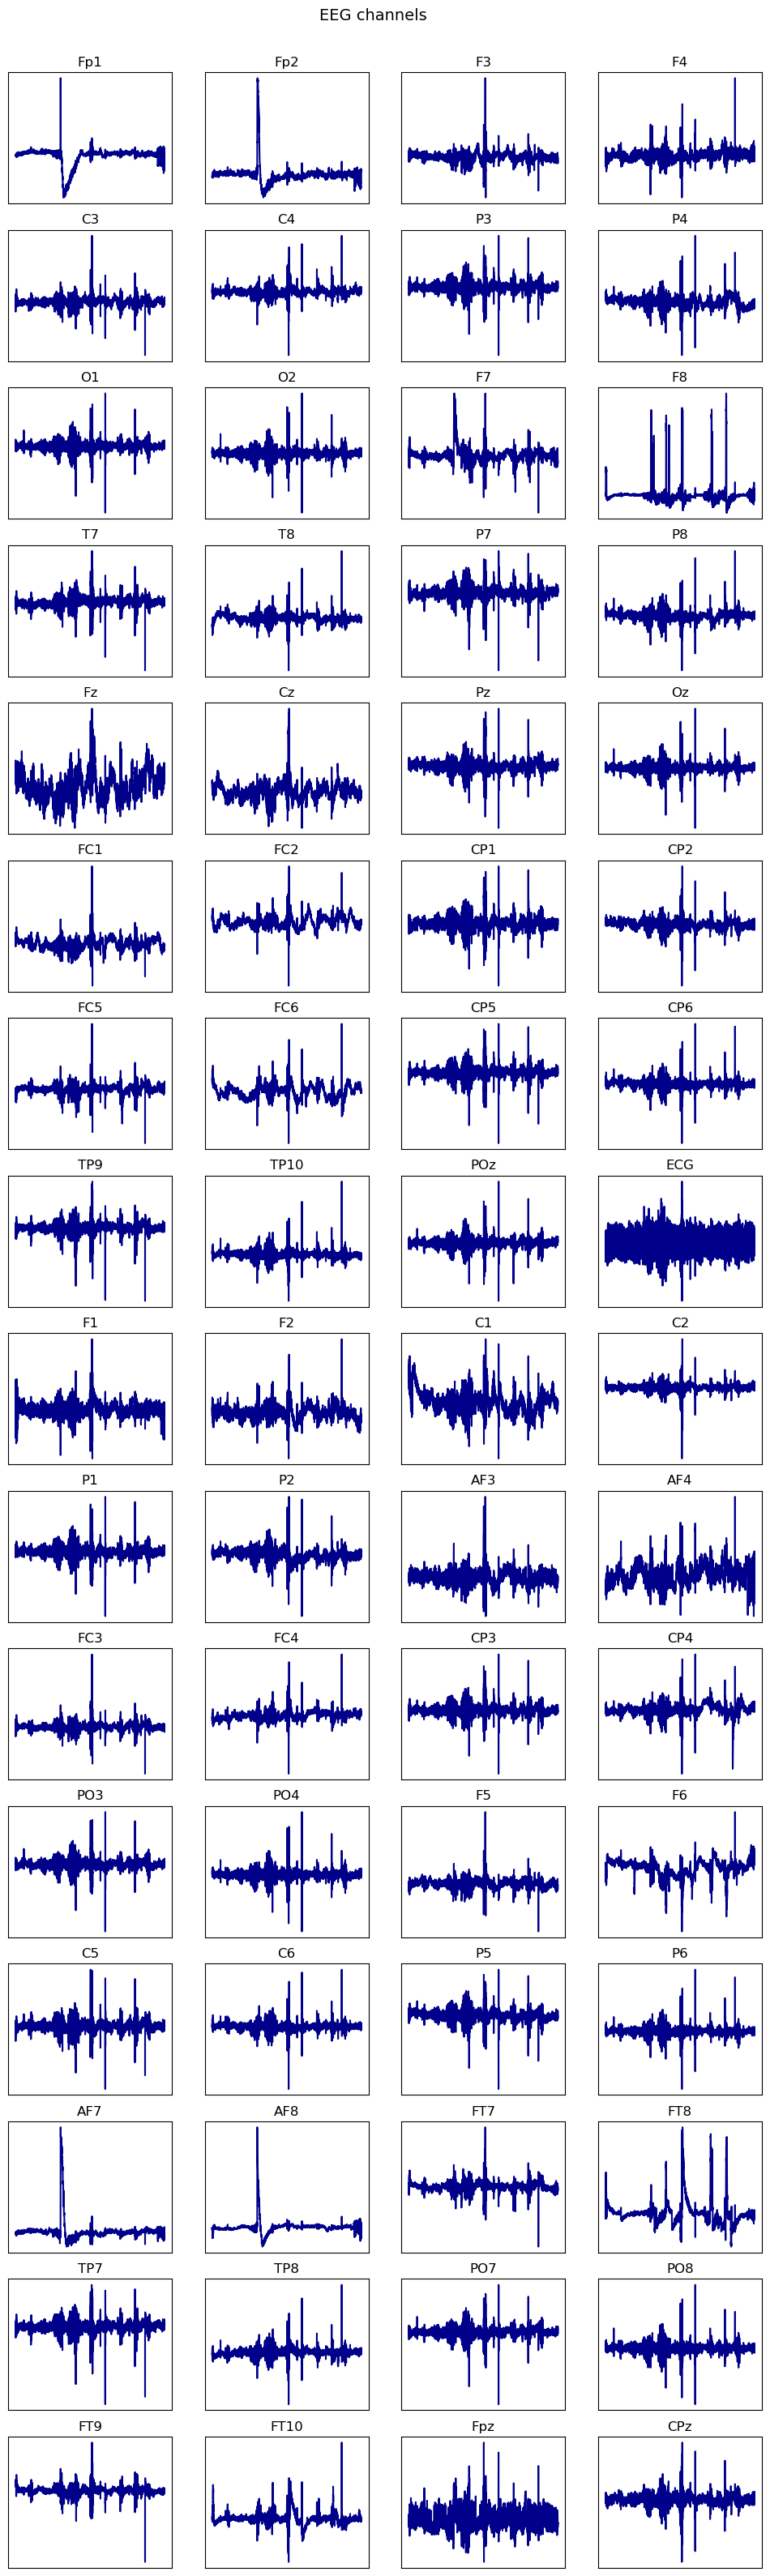

In [22]:
# Compare all channels. 
fig, axes = plt.subplots(nrows = 16, ncols = 4, figsize = (12, 40))
fig.suptitle('EEG channels', fontsize = 14, y = 0.9)
channel_index = 0

# Iterate through all channels. 
for channel in channels_data.ch_names:

    # Compute the row and column indexes. 
    row_index = channel_index // 4
    column_index = channel_index % 4
    
    # Plot the data for the channel. 
    axes[row_index, column_index].plot(np_channels_data[channel_index, :], c = 'darkblue')
    axes[row_index, column_index].set_title(channel)
    axes[row_index, column_index].tick_params(left = False, right = False, labelleft = False, 
                                              labelbottom = False, bottom = False) 

    # Increment. 
    channel_index += 1


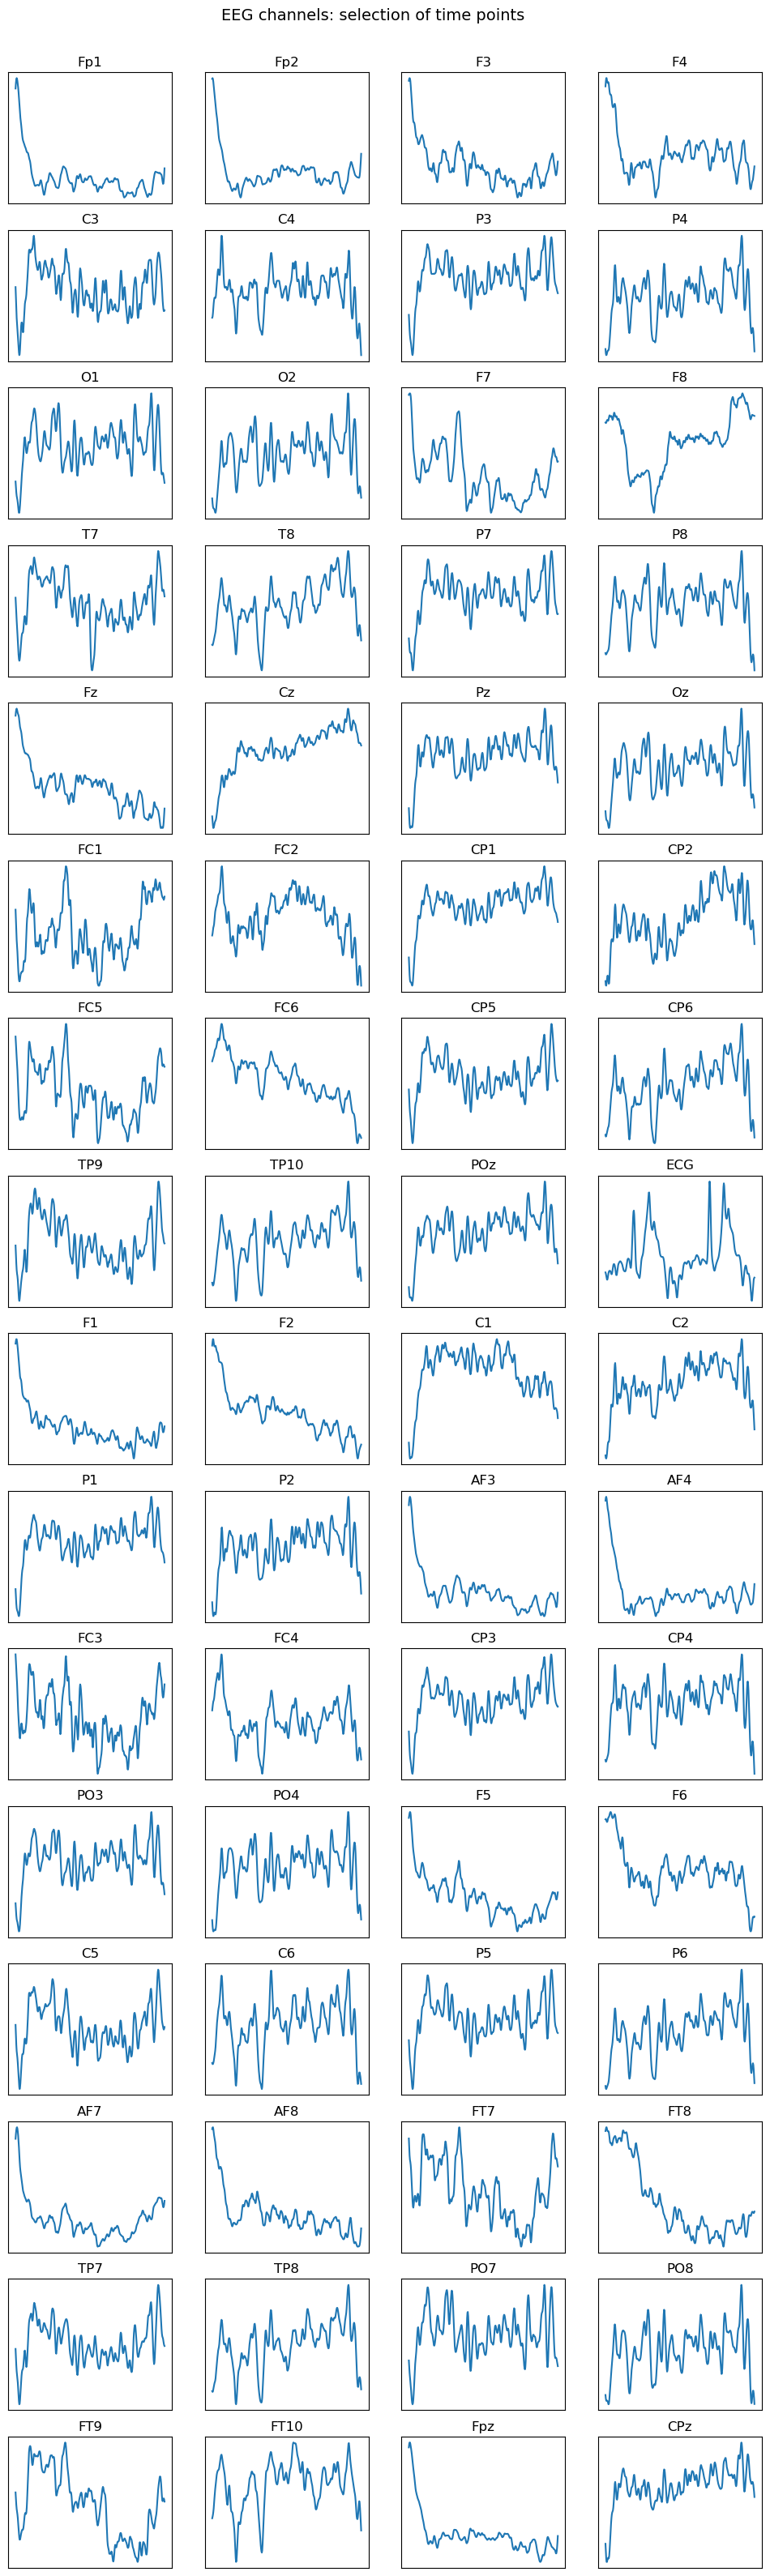

In [23]:
# Compare all channels, focusing on a selection of time points. 
fig, axes = plt.subplots(nrows = 16, ncols = 4, figsize = (12, 40))
fig.suptitle('EEG channels: selection of time points', fontsize = 14, y = 0.9)
channel_index = 0

# Iterate through all channels. 
for channel in channels_data.ch_names:

    # Compute the row and column indexes. 
    row_index = channel_index // 4
    column_index = channel_index % 4
    
    # Plot the data for the channel. 
    axes[row_index, column_index].plot(np_channels_data[channel_index, starting_point:ending_point])
    axes[row_index, column_index].set_title(channel)
    axes[row_index, column_index].tick_params(left = False, right = False, labelleft = False, 
                                              labelbottom = False, bottom = False) 

    # Increment. 
    channel_index += 1


In [24]:
# Compute the Power Spectral Density (PSD) for a selection of time points, for frequencies between 1 and 40 Hz, using the Welch method. 
psd_welch = channels_data.compute_psd(tmin = time_interval[0], tmax = time_interval[1], fmin = 1, fmax = 40, picks = 'eeg', method = 'welch')
psd_welch

Effective window size : 2.005 (s)


<Power Spectrum (from Raw, welch method) | 63 channels × 78 freqs, 1.5-39.9 Hz>

In [25]:
# Identify the new C1 channel index, since the ECG channel was dropped during the PSD computation. 
c1_channel_index_psd = psd_welch.ch_names.index('C1')
c1_channel_index_psd

33

In [26]:
# Extract the PSD data as a NumPy array, then store and display its shape. 
np_psd_welch = psd_welch.get_data()
nb_channels_psd = np_psd_welch.shape[0]
nb_bins_psd = np_psd_welch.shape[1]
np_psd_welch.shape

(63, 78)

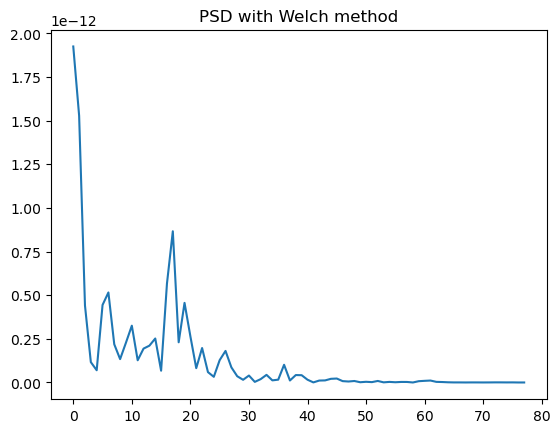

In [27]:
# Plot the PSD data for the C1 channel. 
plt.plot(np_psd_welch[c1_channel_index_psd, :])
plt.title('PSD with Welch method');

In [28]:
# Extract the PSD frequencies as a NumPy array, and display its shape. 
np_psd_welch_freqs = psd_welch.freqs
np_psd_welch_freqs.shape

(78,)

In [29]:
# Display the frequencies. 
np_psd_welch_freqs

array([ 1.49625935,  1.99501247,  2.49376559,  2.9925187 ,  3.49127182,
        3.99002494,  4.48877805,  4.98753117,  5.48628429,  5.98503741,
        6.48379052,  6.98254364,  7.48129676,  7.98004988,  8.47880299,
        8.97755611,  9.47630923,  9.97506234, 10.47381546, 10.97256858,
       11.4713217 , 11.97007481, 12.46882793, 12.96758105, 13.46633416,
       13.96508728, 14.4638404 , 14.96259352, 15.46134663, 15.96009975,
       16.45885287, 16.95760599, 17.4563591 , 17.95511222, 18.45386534,
       18.95261845, 19.45137157, 19.95012469, 20.44887781, 20.94763092,
       21.44638404, 21.94513716, 22.44389027, 22.94264339, 23.44139651,
       23.94014963, 24.43890274, 24.93765586, 25.43640898, 25.93516209,
       26.43391521, 26.93266833, 27.43142145, 27.93017456, 28.42892768,
       28.9276808 , 29.42643392, 29.92518703, 30.42394015, 30.92269327,
       31.42144638, 31.9201995 , 32.41895262, 32.91770574, 33.41645885,
       33.91521197, 34.41396509, 34.9127182 , 35.41147132, 35.91

In [30]:
# Compute the Power Spectral Density (PSD) for a selection of time points, for frequencies between 1 and 40 Hz, using the multitaper method. 
psd_multitaper = channels_data.compute_psd(tmin = time_interval[0], tmax = time_interval[1], fmin = 1, fmax = 40, picks = 'eeg', method = 'multitaper')
psd_multitaper

    Using multitaper spectrum estimation with 7 DPSS windows


<Power Spectrum (from Raw, multitaper method) | 63 channels × 78 freqs, 1.5-39.9 Hz>

In [31]:
# Extract the PSD data as a NumPy array, and display its shape. 
np_psd_multitaper = psd_multitaper.get_data()
np_psd_multitaper.shape

(63, 78)

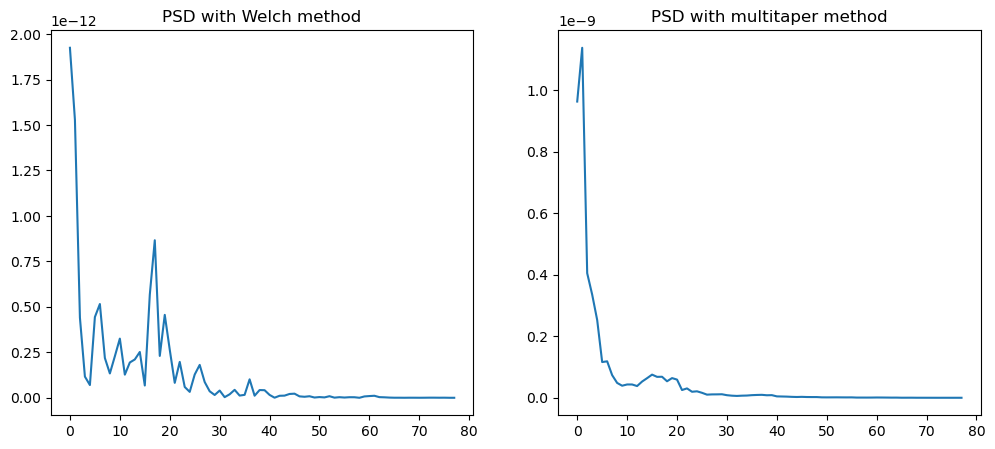

In [32]:
# Plot the PSD data for the C1 channel, comparing the Welch method and the multitaper method. 
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
axes[0].plot(np_psd_welch[c1_channel_index_psd, :])
axes[0].set_title('PSD with Welch method')
axes[1].plot(np_psd_multitaper[c1_channel_index_psd, :])
axes[1].set_title('PSD with multitaper method');

In [33]:
# Define the frequency bands of interest. 
frequency_bands = [(1, 4, 'Delta'), (4, 8, 'Theta'), (8, 12, 'Alpha'), (12, 16, 'Sigma'), (16, 30, 'Beta'), (30, 40, 'Gamma')]
frequency_bands

[(1, 4, 'Delta'),
 (4, 8, 'Theta'),
 (8, 12, 'Alpha'),
 (12, 16, 'Sigma'),
 (16, 30, 'Beta'),
 (30, 40, 'Gamma')]

In [34]:
# Using the YASA library, compute the bandpowers for a selection of time points, for our frequency bands of interest, using the Welch method. 
bandpowers = yasa.bandpower(np_channels_data[:, starting_point:ending_point], 
                            sf = sampling_frequency, ch_names = channels_data.ch_names, 
                            bands = frequency_bands, win_sec = 2)
bandpowers

Delta     Theta     Alpha     Sigma      Beta     Gamma  \
Chan                                                               
Fp1   0.572535  0.336340  0.033168  0.028720  0.027503  0.001735   
Fp2   0.647370  0.179711  0.106139  0.030980  0.032926  0.002875   
F3    0.385527  0.443982  0.084922  0.027196  0.053737  0.004636   
F4    0.517289  0.365549  0.056774  0.026366  0.031795  0.002226   
C3    0.171435  0.386040  0.218911  0.133508  0.087678  0.002428   
...        ...       ...       ...       ...       ...       ...   
PO8   0.290636  0.367236  0.189356  0.130412  0.021546  0.000814   
FT9   0.516539  0.416764  0.026549  0.023586  0.015717  0.000844   
FT10  0.590978  0.335753  0.043581  0.014255  0.014848  0.000585   
Fpz   0.631579  0.204415  0.092298  0.037839  0.031436  0.002434   
CPz   0.304836  0.229145  0.272712  0.115114  0.074499  0.003694   

       TotalAbsPow  FreqRes  Relative  
Chan                                   
Fp1   6.852587e-11      0.5      True  
Fp2   5.440653e-11      0.5      True  
F3    1.287512e-11      0.5      True  
F4    1.371988e-11      0.5      True  
C3    1.133895e-11      0.5      True  
...            ...      ...       ...  
PO8   1.267450e-10      0.5      True  
FT9   1.377688e-10      0.5      True  
FT10  1.886207e-10      0.5      True  
Fpz   4.841667e-11      0.5      True  
CPz   6.809918e-12      0.5      True  

[64 rows x 9 columns]

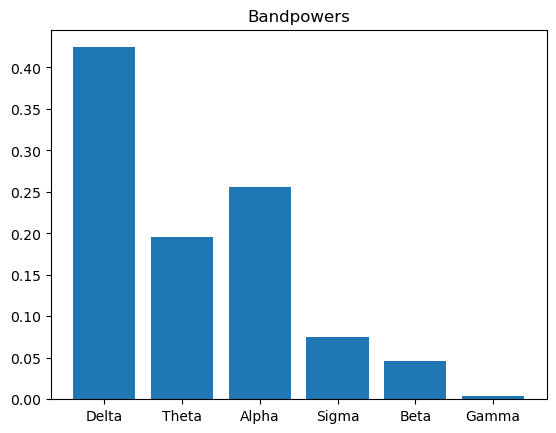

In [35]:
# Plot the bandpowers. 
frequency_bands_names = ['Delta', 'Theta', 'Alpha', 'Sigma', 'Beta', 'Gamma']
plt.bar(frequency_bands_names, bandpowers.iloc[c1_channel_index, 0:6])
plt.title('Bandpowers');

## **3. Features Extraction**

We **extract the features** by selecting a scan duration that matches the fMRI data, and computing the bandpowers for each scan. We observe that the eegNF condition is missing for subject sub-xp102, and that the fmriNF and eegfmriNF conditions are slightly longer for subject sub-xp104. 

In [36]:
# Define the number of scans, the scan duration in seconds, and the minimal and maximal frequencies for the PSD. 
nb_scans = 200
scan_duration = 2 # In seconds. 
fmin = 1 # In Hz. 
fmax = 40 # In Hz. 

# Define the features dictionary and the summary DataFrame. 
dict_features_bandpowers_values = dict()
df_summary = pd.DataFrame()

# Compute and display the sampling window, i.e., the number of data points during each scan duration. 
sampling_window = int(scan_duration * sampling_frequency)
sampling_window

400

In [37]:
%%capture
# The magic command above hides all outputs from this cell. 

# Iterate through all subjects. 
for subject in subjects:

    # Display current subject. 
    print(subject)

    # Define the subject dictionary. 
    dict_features_bandpowers_values[subject] = dict()

    # Iterate through all conditions. 
    for condition in ['eegNF', 'fmriNF', 'eegfmriNF']:

        # Skip the current iteration for sub-xp102 and eegNF, since that run is missing. 
        if subject == 'sub-xp102' and condition == 'eegNF':
            df_summary.loc[subject, condition] = 'Missing'
            continue

        # Load and extract the EEG data. 
        vhdr_path = raw_data_path + 'derivatives/' + subject + '/eeg_pp/' + subject + '_task-' + condition + '_eeg_pp.vhdr'
        channels_data = mne.io.read_raw_brainvision(vhdr_path, misc = ['ECG'], preload = True, verbose = False)
        np_channels_data = channels_data.get_data()
        df_summary.loc[subject, condition] = str(np_channels_data.shape)

        # Define the condition dictionary, and the array to store the bandpowers values. 
        dict_features_bandpowers_values[subject][condition] = np.zeros((nb_channels_psd, len(frequency_bands), nb_scans))
        
        # Iterate through all scans. 
        for scan in range(nb_scans):
            
            # Compute the bandpowers using Welch method. 
            bandpowers = yasa.bandpower(np_channels_data[:, (scan * sampling_window):(scan * sampling_window) + sampling_window], 
                                        sf = sampling_frequency, ch_names = channels_data.ch_names, 
                                        bands = frequency_bands, win_sec = scan_duration)
                    
            # Store the bandpowers values. 
            dict_features_bandpowers_values[subject][condition][:, :, scan] = bandpowers.iloc[:, 0:6].drop('ECG')

In [38]:
# Display the summary DataFrame. 
df_summary

eegNF       fmriNF    eegfmriNF
sub-xp101  (64, 80200)  (64, 80200)  (64, 80200)
sub-xp102      Missing  (64, 80200)  (64, 80200)
sub-xp103  (64, 80200)  (64, 80200)  (64, 80200)
sub-xp104  (64, 80200)  (64, 80400)  (64, 80400)
sub-xp105  (64, 80200)  (64, 80200)  (64, 80200)
sub-xp106  (64, 80200)  (64, 80200)  (64, 80200)
sub-xp107  (64, 80200)  (64, 80200)  (64, 80200)
sub-xp108  (64, 80200)  (64, 80200)  (64, 80200)
sub-xp109  (64, 80200)  (64, 80200)  (64, 80200)
sub-xp110  (64, 80200)  (64, 80200)  (64, 80200)

## **4. Feature Engineering**

We observe that different bandpowers have significantly different mean values, a well-known effect in EEG datasets. We perform **feature engineering** by normalizing the features, and replacing the outliers (STD > 4) by the value of the previous scan, while also keeping the bandpowers without normalization as an alternative features set. 

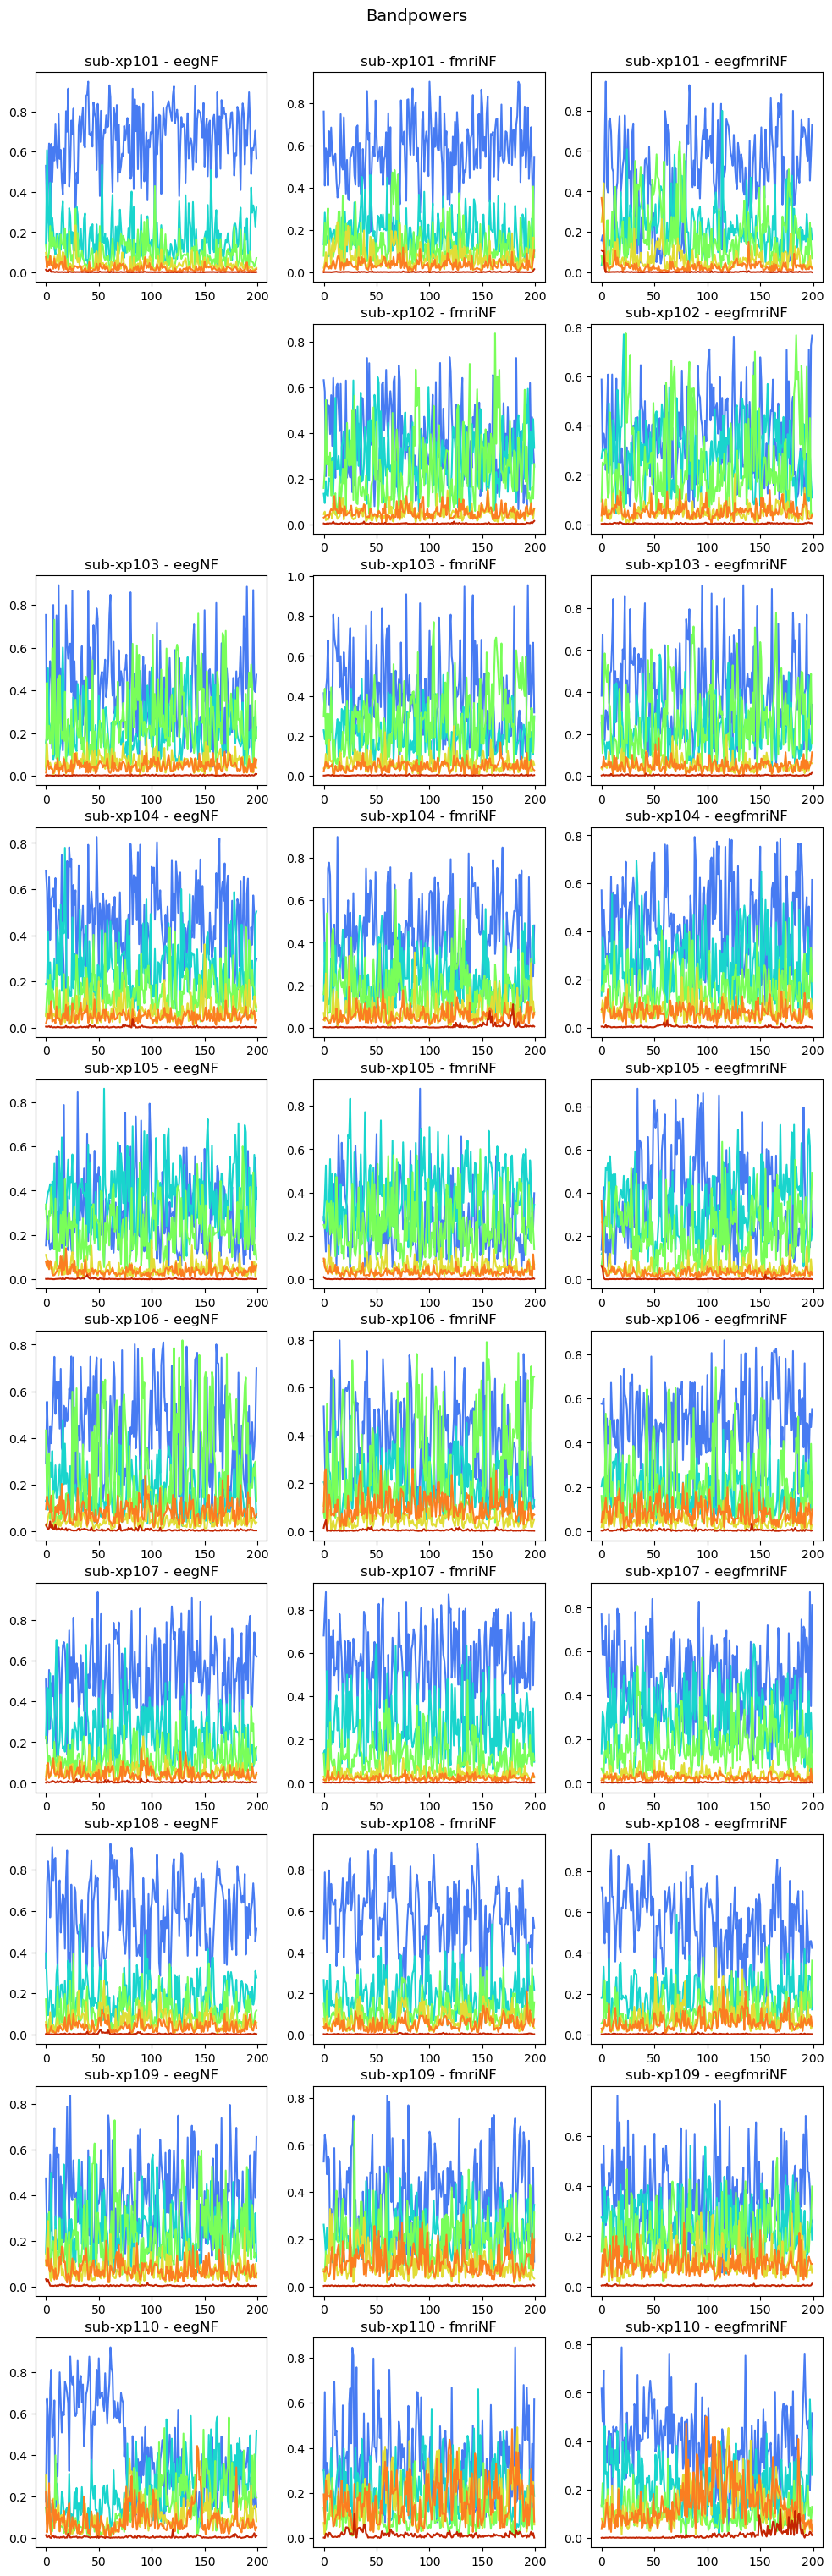

In [39]:
# Plot the bandpowers values by subject and condition for the C1 channel. 
fig, axes = plt.subplots(nrows = 10, ncols = 3, figsize = (12, 38))
fig.suptitle('Bandpowers', fontsize = 14, y = 0.9)
subject_index = 0

# Iterate through all subjects. 
for subject in subjects:
    condition_index = 0
    
    # Iterate through all conditions. 
    for condition in ['eegNF', 'fmriNF', 'eegfmriNF']:
        bandpower_index = 0

        # Skip the current iteration for sub-xp102 and eegNF, since that run is missing. 
        if subject == 'sub-xp102' and condition == 'eegNF':
            axes[subject_index, condition_index].set_visible(False)
            condition_index += 1
            continue

        # Iterate through all bandpowers. 
        for bandpower in ['Delta', 'Theta', 'Alpha', 'Sigma', 'Beta', 'Gamma']:
            
            # Define colormap and select a color. 
            cm = plt.colormaps['turbo']
            c = cm(0.15 * bandpower_index + 0.15)
    
            # Retrieve and plot the bandpowers values for the C1 channel. The C1 channel position is shifted because we dropped the ECG channel. 
            bandpower_values = dict_features_bandpowers_values[subject][condition][c1_channel_index_psd, bandpower_index, :]
            axes[subject_index, condition_index].plot(bandpower_values, color = c)
            axes[subject_index, condition_index].set_title(subject + ' - ' + condition)

            # Increment the bandpower index. 
            bandpower_index += 1

        # Increment the condition index. 
        condition_index += 1

    # Increment the subject index. 
    subject_index += 1

In [40]:
# Define a dictionary to store the normalized bandpowers, and a DataFrame to store the outliers. 
dict_features_bandpowers_normalized = dict()
df_outliers = pd.DataFrame()

# Iterate through all subjects. 
for subject in subjects:

    # Define the subject dictionary. 
    dict_features_bandpowers_normalized[subject] = dict()
    
    # Iterate through all conditions. 
    for condition in ['eegNF', 'fmriNF', 'eegfmriNF']:

        # Skip the current iteration for sub-xp102 and eegNF, since that run is missing. 
        if subject == 'sub-xp102' and condition == 'eegNF':
            continue

        # Compute the normalized bandpowers. 
        bandpowers = dict_features_bandpowers_values[subject][condition]
        bandpowers_mean = np.mean(bandpowers, axis = 2)
        bandpowers_std = np.std(bandpowers, axis = 2)
        bandpowers_normalized = (bandpowers - bandpowers_mean[:, :, np.newaxis]) / bandpowers_std[:, :, np.newaxis]

        # Iterate through all bandpowers. 
        for bandpower_index in range(dict_features_bandpowers_values[subject][condition].shape[1]):
             
             # Iterate through all channels. 
            for channel_index in range(dict_features_bandpowers_values[subject][condition].shape[0]):

                # Replace the outliers (STD > 4) by the value of the previous scan. 
                outliers_counter = 0
                for scan in range(nb_scans):
                    if np.abs(bandpowers_normalized[channel_index, bandpower_index, scan]) > 4:
                        bandpowers_normalized[channel_index, bandpower_index, scan] = bandpowers_normalized[channel_index, bandpower_index, scan - 1]
                        outliers_counter += 1
                    
            # Store the number of outliers in the DataFrame. 
            df_outliers.loc[subject + '/' + condition, 'subject'] = subject
            df_outliers.loc[subject + '/' + condition, 'condition'] = condition
            df_outliers.loc[subject + '/' + condition, frequency_bands_names[bandpower_index]] = outliers_counter

        # Store the normalized bandpowers. 
        dict_features_bandpowers_normalized[subject][condition] = bandpowers_normalized

# Change the indexes and the data type of the outliers DataFrame. 
df_outliers = df_outliers.set_index(['subject', 'condition'])
df_outliers = df_outliers.astype(int)

In [41]:
# Display the outliers DataFrame. 
df_outliers

Delta  Theta  Alpha  Sigma  Beta  Gamma
subject   condition                                         
sub-xp101 eegNF          0      1      0      2     2      4
          fmriNF         0      0      0      1     0      2
          eegfmriNF      0      0      0      2     3      3
sub-xp102 fmriNF         0      0      0      0     0      2
          eegfmriNF      0      0      0      0     1      1
sub-xp103 eegNF          0      0      0      0     1      1
          fmriNF         0      0      0      0     1      0
          eegfmriNF      0      0      0      2     1      1
sub-xp104 eegNF          0      1      1      0     1      1
          fmriNF         0      0      0      1     1      2
          eegfmriNF      0      0      1      0     0      4
sub-xp105 eegNF          1      0      0      1     3      3
          fmriNF         0      0      0      1     1      1
          eegfmriNF      0      0      0      1     1      2
sub-xp106 eegNF          0      0      0      0     0      3
          fmriNF         0      0      0      1     0      2
          eegfmriNF      0      0      0      1     0      2
sub-xp107 eegNF          0      0      1      0     1      1
          fmriNF         0      0      0      2     1      1
          eegfmriNF      0      0      1      2     0      2
sub-xp108 eegNF          0      0      0      0     1      3
          fmriNF         0      0      0      1     2      0
          eegfmriNF      0      0      0      1     0      2
sub-xp109 eegNF          0      0      0      0     2      2
          fmriNF         0      0      1      1     2      0
          eegfmriNF      0      0      0      1     2      2
sub-xp110 eegNF          0      0      0      0     2      1
          fmriNF         0      0      0      1     0      0
          eegfmriNF      0      1      0      0     1      1

In [42]:
# Display the number of outliers by frequency band. 
print(df_outliers.sum())

Delta     1
Theta     3
Alpha     5
Sigma    22
Beta     30
Gamma    49
dtype: int64


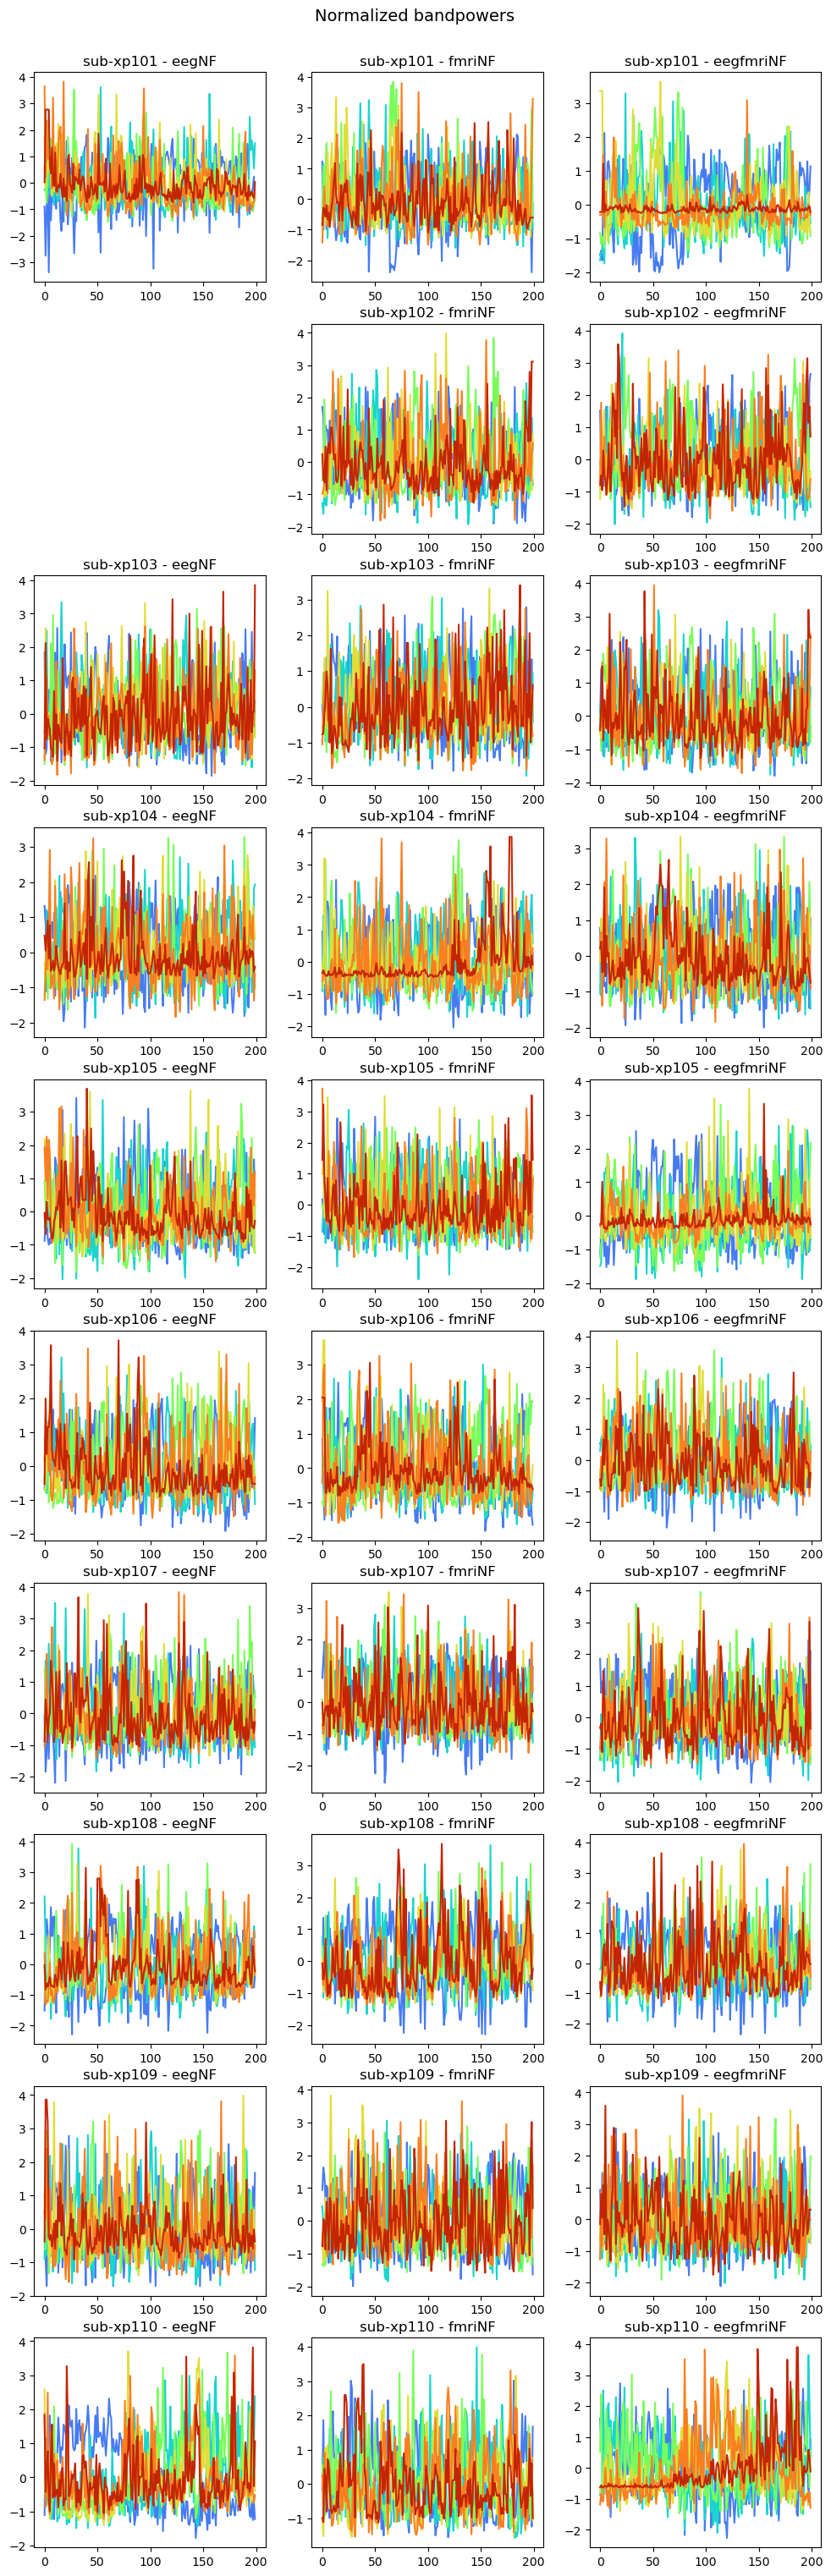

In [43]:
# Plot the normalized bandpowers values by subject and condition for the C1 channel. 
fig, axes = plt.subplots(nrows = 10, ncols = 3, figsize = (12, 38))
fig.suptitle('Normalized bandpowers', fontsize = 14, y = 0.9)
subject_index = 0

# Iterate through all subjects. 
for subject in subjects:
    condition_index = 0
    
    # Iterate through all conditions. 
    for condition in ['eegNF', 'fmriNF', 'eegfmriNF']:
        bandpower_index = 0

        # Skip the current iteration for sub-xp102 and eegNF, since that run is missing. 
        if subject == 'sub-xp102' and condition == 'eegNF':
            axes[subject_index, condition_index].set_visible(False)
            condition_index += 1
            continue

        # Iterate through all bandpowers. 
        for bandpower in ['Delta', 'Theta', 'Alpha', 'Sigma', 'Beta', 'Gamma']:
            
            # Define colormap and select a color. 
            cm = plt.colormaps['turbo']
            c = cm(0.15 * bandpower_index + 0.15)
    
            # Retrieve and plot the normalized bandpowers values for the C1 channel. The C1 channel position is shifted because we dropped the ECG channel. 
            bandpower_values = dict_features_bandpowers_normalized[subject][condition][c1_channel_index_psd, bandpower_index, :]
            axes[subject_index, condition_index].plot(bandpower_values, color = c)
            axes[subject_index, condition_index].set_title(subject + ' - ' + condition)

            # Increment the bandpower index. 
            bandpower_index += 1

        # Increment the condition index. 
        condition_index += 1

    # Increment the subject index. 
    subject_index += 1

## **5. Preprocessed Features**

We save the **preprocessed features** in the appropriate directory. 

In [44]:
# Save the features into Pickle files. 
with open(preprocessed_data_path + 'dict_features_bandpowers.p', 'wb') as file:
    pickle.dump(dict_features_bandpowers_values, file)
with open(preprocessed_data_path + 'dict_features_bandpowers_normalized.p', 'wb') as file:
    pickle.dump(dict_features_bandpowers_normalized, file)